In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2024-07-18 13:59:27.117544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras
from keras import optimizers

In [3]:
tf.__version__

'2.10.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Create a validation set from train set and scale down the pixel values of 0-1

In [7]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255


In [8]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
y_train[0]

4

## How an image looks like as Matrix of Pixel values

In [12]:
X_train[0].shape

(28, 28)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

## Display first 8 images from the Dataset

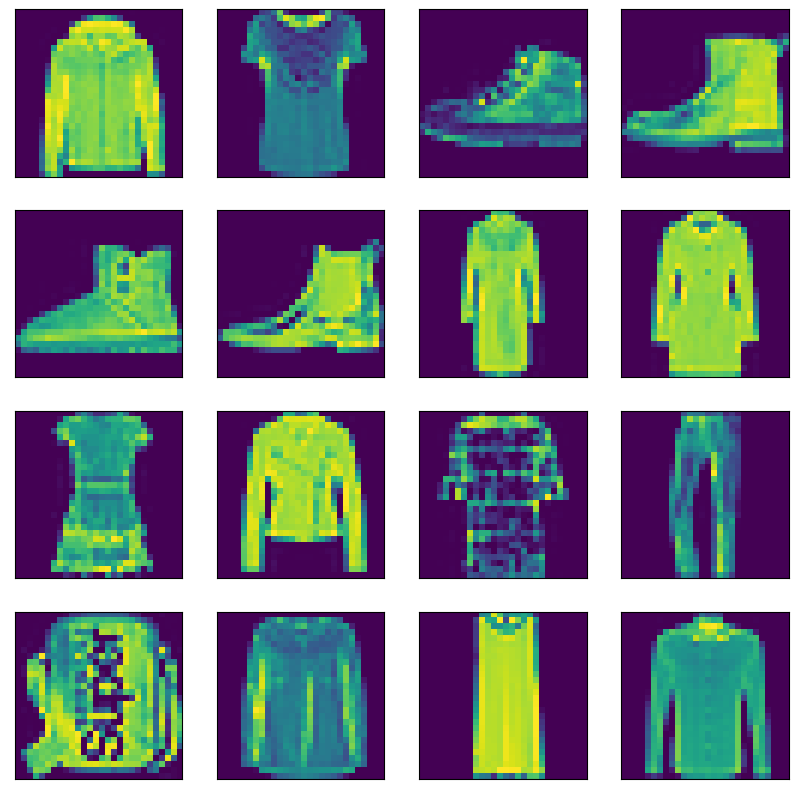

In [15]:
fig, ax = plt.subplots(4,4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i])
    axi.set(xticks=[],yticks=[])

## Create our keras Sequential Model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

## Compile the Model

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])


In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 3s 6ms/step - loss: 1.0417 - accuracy: 0.6816 - val_loss: 0.6947 - val_accuracy: 0.7694
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.6393 - accuracy: 0.7905 - val_loss: 0.5753 - val_accuracy: 0.8144
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5584 - accuracy: 0.8128 - val_loss: 0.5306 - val_accuracy: 0.8252
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5173 - accuracy: 0.8241 - val_loss: 0.5063 - val_accuracy: 0.8278
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.4914 - accuracy: 0.8319 - val_loss: 0.4838 - val_accuracy: 0.8334
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4736 - accuracy: 0.8358 - val_loss: 0.4723 - val_accuracy: 0.8432
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4589 - accuracy: 0.8405 - val_loss: 0.4443 - val_accuracy: 0.8478
Epoch 

## Evaluating our model

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

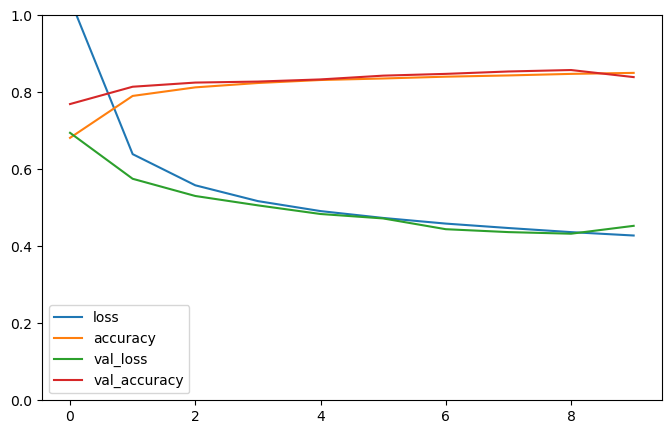

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 71.0218 - accuracy: 0.8153


[71.02183532714844, 0.8152999877929688]

## Use our model to make predictions 

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 163ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
predict_x = model.predict(X_test)
y_pred = np.argmax(predict_x, axis=1)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

### Comparing the Actual and Predicted Values

In [31]:
list(zip(np.array(class_names)[y_test],np.array(class_names)[y_pred]))

[('Ankle Boot', 'Ankle Boot'),
 ('Pullover', 'Pullover'),
 ('Trouser', 'Trouser'),
 ('Trouser', 'Trouser'),
 ('Shirt', 'Shirt'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Coat'),
 ('Shirt', 'Coat'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Coat', 'Coat'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Bag'),
 ('Dress', 'Dress'),
 ('Coat', 'Coat'),
 ('Trouser', 'Trouser'),
 ('Pullover', 'Pullover'),
 ('Coat', 'Pullover'),
 ('Bag', 'Bag'),
 ('T-shirt/Top', 'T-shirt/Top'),
 ('Pullover', 'Pullover'),
 ('Sandal', 'Sneaker'),
 ('Sneaker', 'Sneaker'),
 ('Ankle Boot', 'Sneaker'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Pullover'),
 ('Shirt', 'Shirt'),
 ('T-shirt/Top', 'T-shirt/Top'),
 ('Ankle Boot', 'Ankle Boot'),
 ('Dress', 'Coat'),
 ('Bag', 'Bag'),
 ('Bag', 'Bag'),
 ('Dress', 'Dress'),
 ('Dress', 'Dress'),
 ('Bag', 'Bag'),
 ('T-shirt/Top', 'T-shirt/Top'),
 ('Sneaker', 'Sneaker'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Ankle Boot', 'Ankle Boot'),
 ('Shirt', 'T-shirt/Top'),
 ('Trouser', 'Tro

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[825   6  32  63   5   0  47   0  21   1]
 [  2 955   9  26   5   0   1   0   2   0]
 [ 15   4 821  13 120   0  17   0   9   1]
 [ 23  19  22 871  40   0  17   0   8   0]
 [  0   2 187  41 741   0  21   0   8   0]
 [  1   1   0   0   0 762   0  99  19 118]
 [178   5 202  51 162   0 367   0  35   0]
 [  0   0   0   0   0   3   0 876   2 119]
 [  2   1  15   7   2   1   9   4 957   2]
 [  0   0   0   0   0   0   0  21   1 978]]


In [36]:
matrix = classification_report(y_test, y_pred, labels=[1,0])
print('Classification report: \n', matrix)

Classification report: 
               precision    recall  f1-score   support

           1       0.96      0.95      0.96      1000
           0       0.79      0.82      0.81      1000

   micro avg       0.87      0.89      0.88      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.88      0.89      0.88      2000



In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.8153